WRITING NAME IS DEVNAGIRI

In [1]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"

print(dev_name)

सिमरन मतपाल


IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, euclidean_distances,pairwise_distances
from sklearn.model_selection import KFold
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Data Wrangling
print("\nNull Values:\n", df.isnull().sum())


Null Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


EXTRACTING RELEVANT FEATURES

In [6]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)',]]

VISUALIZING UNCLUSTERED DATA

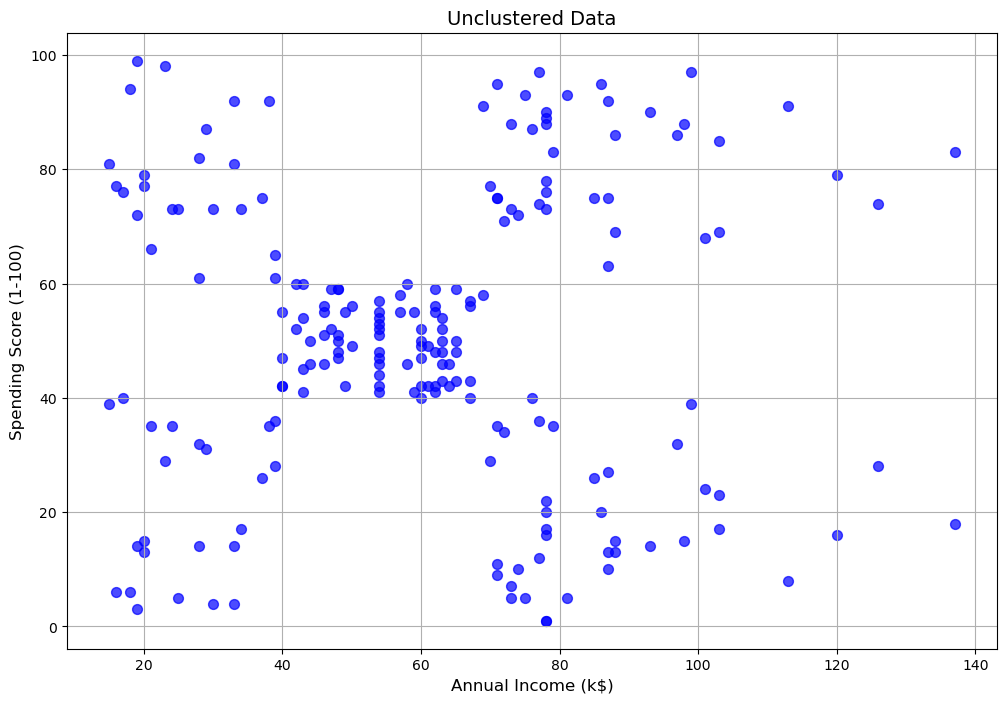

In [7]:
# Create a 2D scatter plot for unclustered data
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot with 'Annual Income' and 'Spending Score'
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], 
            color='blue', s=50, alpha=0.7)  # Blue points with specified size and transparency

# Set titles and labels
plt.title('Unclustered Data', fontsize=14)  # Title for the scatter plot
plt.xlabel('Annual Income (k$)', fontsize=12)  # X-axis label for Annual Income
plt.ylabel('Spending Score (1-100)', fontsize=12)  # Y-axis label for Spending Score

plt.grid(True)  # Enable gridlines for better readability
plt.show()  # Display the plot


STANDARDRIZING THE FEATURES

In [8]:
# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


ELBOW AND SILHOUETTE METHODS TO FIND OPTIMAL K

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

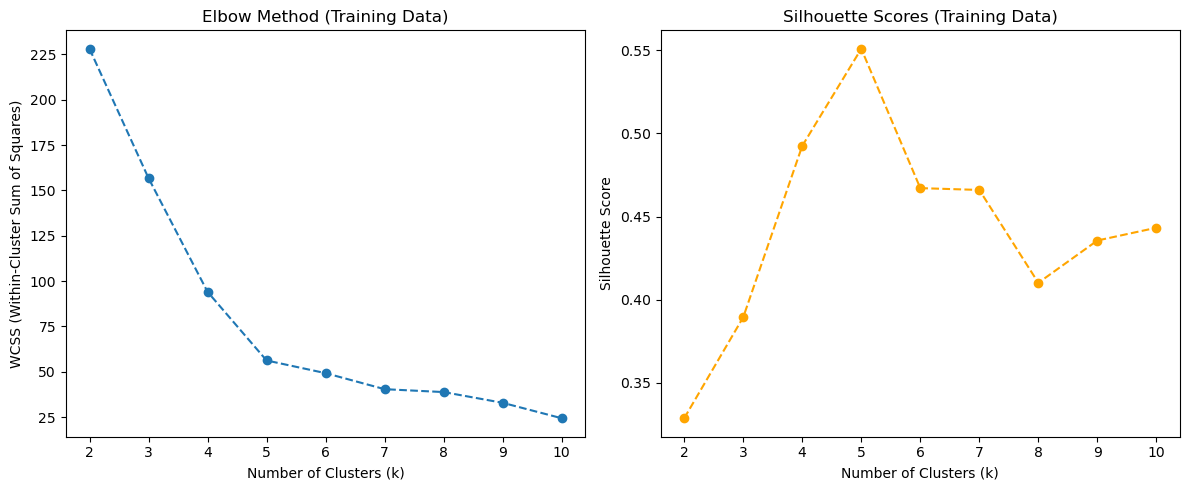

Optimal number of clusters (Silhouette method): 5
Optimal number of clusters (Elbow method): 6
Optimal Value of k: 5


In [9]:
# Splitting the dataset into training and testing sets
x_train, x_test = train_test_split(x_scaled, test_size=0.2, random_state=42)

# Automated Elbow and Silhouette method to choose the best k using training data
wcss = []  # List to store sum of squared distance (wcss) for each k
silhouette_scores = []  # List to store silhouette scores for each k
k_range = range(2, min(11, len(x_train)))  # Range of k values from 2 to 11 or number of samples

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
    labels = kmeans.fit_predict(x_train)  # Fit model and predict cluster labels
    
    wcss.append(kmeans.inertia_)  # Append WCSS (inertia) to the list
    
    silhouette_avg = silhouette_score(x_train, labels)  # Calculate average silhouette score
    silhouette_scores.append(silhouette_avg)  # Store the silhouette score

# Find optimal k using Elbow and Silhouette methods
wcss_diff = np.diff(wcss)  # Calculate first derivative of WCSS
wcss_diff2 = np.diff(wcss_diff)  # Calculate second derivative of WCSS
elbow_k = np.argmin(wcss_diff2) + 1  # Find the k at the elbow point
best_k_silhouette = np.argmax(silhouette_scores) + 2  # Find the k with the highest silhouette score

# Final decision on optimal k
optimal_k = best_k_silhouette if best_k_silhouette < elbow_k else elbow_k  # Choose the best k

# Visualize Elbow Method
plt.figure(figsize=(12, 5))  # Set figure size for the plots

# Plot WCSS for Elbow Method
plt.subplot(1, 2, 1)  # Create a subplot for WCSS
plt.plot(k_range, wcss, marker='o', linestyle='--')  # Plot WCSS against k
plt.axvline(x=elbow_k, color='r', linestyle='--', label='best elbow k') 
plt.title('Elbow Method (Training Data)')  # Title for the Elbow plot
plt.xlabel('Number of Clusters (k)')  # X-axis label
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')  # Y-axis label
plt.xticks(k_range)  # Set x-ticks to k values

# Plot Silhouette Scores
plt.subplot(1, 2, 2)  # Create a subplot for Silhouette Scores
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o', color='orange', linestyle='--')  # Plot silhouette scores
plt.title('Silhouette Scores (Training Data)')  # Title for the Silhouette plot
plt.axvline(x=best_k_silhouette, color='r', linestyle='--', label='best_k_silhouette') 
plt.xlabel('Number of Clusters (k)')  # X-axis label
plt.ylabel('Silhouette Score')  # Y-axis label
plt.xticks(range(2, len(silhouette_scores) + 2))  # Set x-ticks for silhouette scores

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Output the optimal k values from both methods
print(f"Optimal number of clusters (Silhouette method): {best_k_silhouette}")
print(f"Optimal number of clusters (Elbow method): {elbow_k}")
print(f"Optimal Value of k: {optimal_k}")

VISULAIZING THE CLUSTERED DATA ALONG WITH CENTROID

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


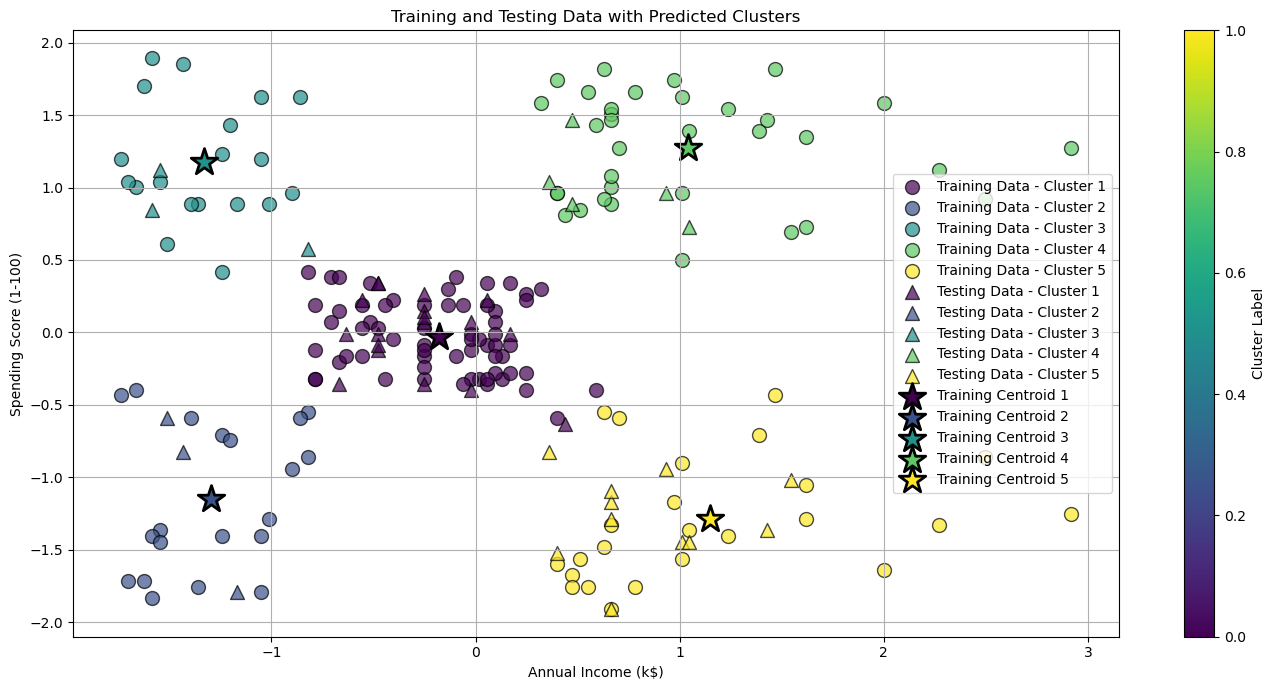

In [10]:
# Split the dataset into training and testing sets
x_train, x_test = train_test_split(x_scaled, test_size=0.2, random_state=42)

#Fit KMeans model to the training data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Initialize KMeans
kmeans.fit(x_train)  # Fit on training data

#Predict labels for both training and testing data
train_labels = kmeans.predict(x_train)  # Predict labels for training data
test_labels = kmeans.predict(x_test)  # Predict labels for testing data

# Get centroids
centroids = kmeans.cluster_centers_

#Visualization of training and testing data with predicted cluster labels
plt.figure(figsize=(14, 7))  # Set figure size

# Scatter plot for both training and testing data
plt.title('Training and Testing Data with Predicted Clusters')  # Title for the combined plot
plt.xlabel('Annual Income (k$)')  # X-axis label
plt.ylabel('Spending Score (1-100)')  # Y-axis label

# Create a color map for training and testing data
colors = plt.cm.viridis(np.linspace(0, 1, optimal_k))

# Scatter plot for training data
for i in range(optimal_k):
    plt.scatter(x_train[train_labels == i, 0], 
                x_train[train_labels == i, 1], 
                color=colors[i], 
                s=100, 
                alpha=0.7, 
                edgecolor='k', 
                label=f'Training Data - Cluster {i + 1}')

# Scatter plot for testing data
for i in range(optimal_k):
    plt.scatter(x_test[test_labels == i, 0], 
                x_test[test_labels == i, 1], 
                color=colors[i], 
                s=100, 
                alpha=0.7, 
                edgecolor='k', 
                marker='^', 
                label=f'Testing Data - Cluster {i + 1}')

# Plot centroids for training data only
for i in range(optimal_k):
    plt.scatter(centroids[i, 0], centroids[i, 1], s=400, marker='*', 
                color=colors[i], 
                edgecolor='k', 
                linewidth=2, 
                label=f'Training Centroid {i + 1}')  

# Create a color bar to indicate cluster labels
plt.colorbar(label='Cluster Label')  # Color bar for training data
plt.legend()  # Show legend for the plots

plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


FUNCTION FOR WITHIN CLUSTER DISTANCE AND BETWEEN CLUSTER DISTANCE

In [11]:
# Function to calculate and print within-cluster and between-cluster distances
def calculate_cluster_distances(data, centroids, labels):
    # Convert data to DataFrame for easier manipulation
    df = pd.DataFrame(data)
    
    # Calculate total within-cluster distance (scatter matrix)
    total_within_cluster_distance = 0
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        # Use np.where to get the indices of points in the current cluster
        cluster_indices = np.where(labels == label)[0]
        cluster_data = df.iloc[cluster_indices]  # Get data points for the cluster
        
        if len(cluster_data) > 1:  # Only calculate if more than one point
            scatter_matrix = np.cov(cluster_data, rowvar=False)  # Scatter matrix for the cluster
            # Calculate within-cluster distance as the trace of the scatter matrix
            total_within_cluster_distance += np.trace(scatter_matrix)
    
    # Calculate distances between centroids
    centroid_df = pd.DataFrame(centroids)  # Convert centroids to DataFrame
    centroid_distances = np.linalg.norm(centroid_df.values[:, np.newaxis] - centroid_df.values[np.newaxis, :], axis=2)
    np.fill_diagonal(centroid_distances, np.inf)  # Ignore self-distances
    
    # Minimum between-cluster distance (shortest distance between any two centroids)
    min_between_cluster_distance = np.min(centroid_distances)
    
    # Print essential evaluation metrics
    print(f"Total Within-Cluster Distance: {total_within_cluster_distance:.2f}")
    print(f"Minimum Between-Cluster Distance: {min_between_cluster_distance:.2f}")
    
    # Print distances between centroids
    print("\nDistances Between Centroids:")
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            print(f"Centroid {i + 1} to Centroid {j + 1}: {centroid_distances[i, j]:.2f}")
    
    return total_within_cluster_distance, min_between_cluster_distance

# Example call of the function (ensure x_scaled, centroids, and labels are defined)
total_within_cluster_distance, min_between_cluster_distance = calculate_cluster_distances(x_scaled, centroids, labels)

Total Within-Cluster Distance: 13.38
Minimum Between-Cluster Distance: 1.58

Distances Between Centroids:
Centroid 1 to Centroid 2: 1.58
Centroid 1 to Centroid 3: 1.67
Centroid 1 to Centroid 4: 1.79
Centroid 1 to Centroid 5: 1.83
Centroid 2 to Centroid 3: 2.32
Centroid 2 to Centroid 4: 3.37
Centroid 2 to Centroid 5: 2.45
Centroid 3 to Centroid 4: 2.37
Centroid 3 to Centroid 5: 3.50
Centroid 4 to Centroid 5: 2.56


K FOLD VALIDATION TO EVALUATE CLUSTERING

In [12]:
# K-fold validation to evaluate the stability of clustering
def perform_kfold_validation(data, n_splits=5, k=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Initialize KFold
    fold_scores = []  # List to store silhouette scores for each fold
    
    print("Starting K-Fold Validation...")
    fold_count = 1
    for train_index, test_index in kf.split(data):
        train_data, test_data = data[train_index], data[test_index]  # Split data into training and testing
        kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
        kmeans.fit(train_data)  # Fit KMeans on training data
        test_labels = kmeans.predict(test_data)  # Predict labels for test data
        score = silhouette_score(test_data, test_labels)  # Calculate silhouette score
        fold_scores.append(score)  # Store score
        
        print(f"Fold {fold_count}: Silhouette Score = {score:.3f}")  # Print score for current fold
        fold_count += 1
    
    print("Completed K-Fold Validation.")
    average_score = sum(fold_scores) / len(fold_scores)  # Calculate average score
    print(f"Average Silhouette Score: {average_score:.3f}")

    # Interpretation of the average Silhouette Score
    if average_score >= 0.5:
        print("Clustering result: Good (clusters are well-defined and separated).")
    elif average_score >= 0.25:
        print("Clustering result: Fair (clusters show some overlap).")
    else:
        print("Clustering result: Poor (clusters are poorly defined or misclassified).")

    return fold_scores  # Return scores for further analysis

# Call the function with the standardized data and optimal k
k_fold_scores = perform_kfold_validation(x_scaled, n_splits=5, k=optimal_k)


Starting K-Fold Validation...
Fold 1: Silhouette Score = 0.567


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fold 2: Silhouette Score = 0.401
Fold 3: Silhouette Score = 0.508


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Fold 4: Silhouette Score = 0.564
Fold 5: Silhouette Score = 0.539
Completed K-Fold Validation.
Average Silhouette Score: 0.516
Clustering result: Good (clusters are well-defined and separated).


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AGLOMERATIVE CLUSTERING

For n_clusters = 2, the average silhouette score is 0.388
For n_clusters = 3, the average silhouette score is 0.455
For n_clusters = 4, the average silhouette score is 0.494
For n_clusters = 5, the average silhouette score is 0.552
For n_clusters = 6, the average silhouette score is 0.530
For n_clusters = 7, the average silhouette score is 0.522
For n_clusters = 8, the average silhouette score is 0.443
For n_clusters = 9, the average silhouette score is 0.451
For n_clusters = 10, the average silhouette score is 0.445

Best number of clusters by silhouette score: 5 with a score of 0.552


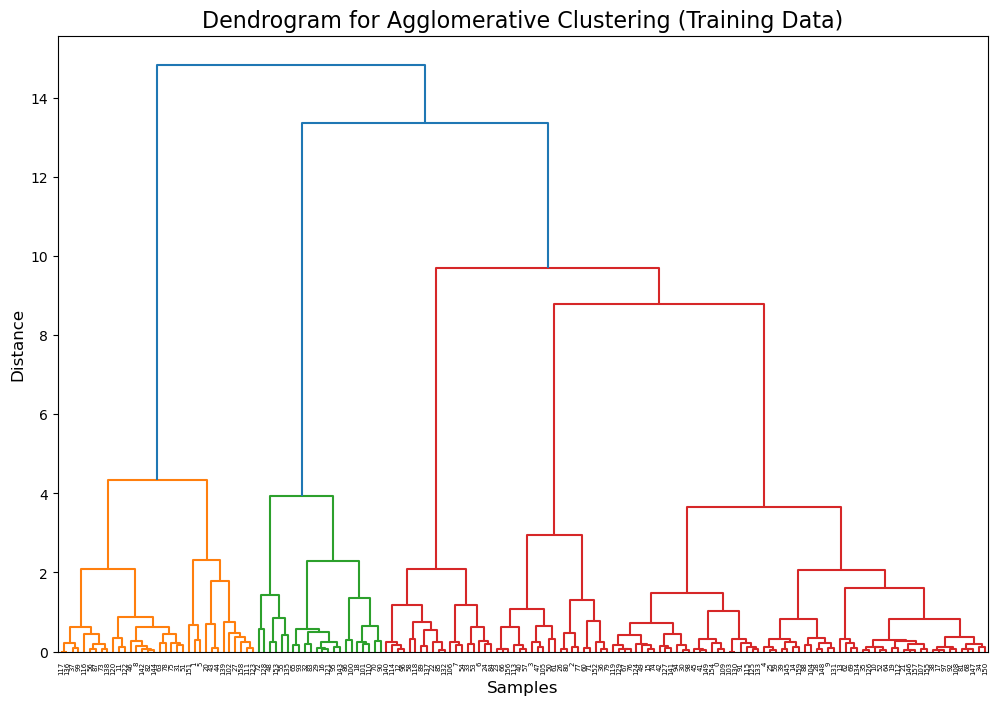

C:\Users\simra\AppData\Local\Temp\ipykernel_412\3845557181.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', best_k)  # Use a colormap to assign consistent colors


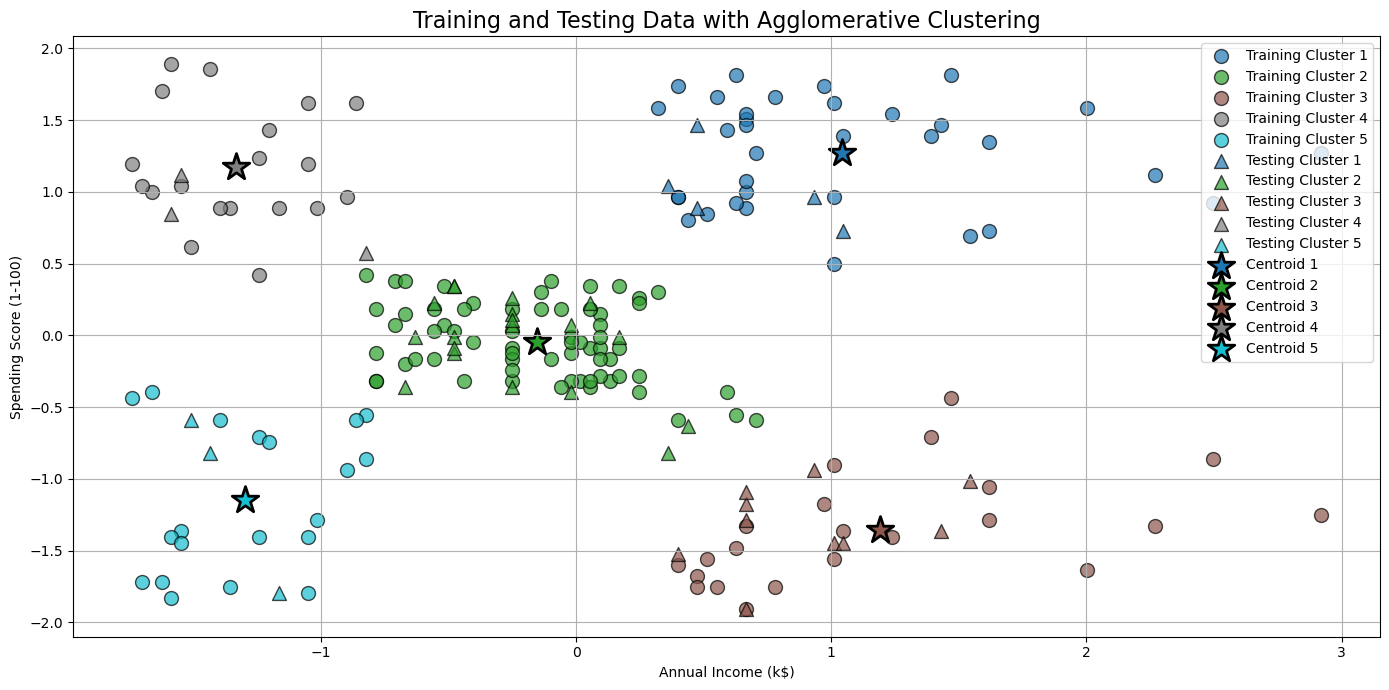

In [13]:
# Step 1: Split the dataset into training and testing sets
x_train, x_test = train_test_split(x_scaled, test_size=0.2, random_state=42)

# Step 2: Find the optimal number of clusters using Silhouette Score
range_n_clusters = list(range(2, 11))  # Test a range of cluster numbers (from 2 to 10)
best_k = 2
best_silhouette_score = -1  # Initialize best silhouette score to a very low value

for k in range_n_clusters:
    agl = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agl.fit_predict(x_train)
    silhouette_avg = silhouette_score(x_train, labels)
    print(f"For n_clusters = {k}, the average silhouette score is {silhouette_avg:.3f}")
    
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

print(f"\nBest number of clusters by silhouette score: {best_k} with a score of {best_silhouette_score:.3f}")

# Step 3: Fit Agglomerative Clustering model to the training data using the optimal number of clusters
agl = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
train_labels = agl.fit_predict(x_train)

# Step 4: Plot the dendrogram for the training data after fitting the model
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(x_train, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering (Training Data)', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

# Step 5: Predict clusters for the testing data using the nearest centroid approximation
def nearest_centroid_predict(centroids, data):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Calculate centroids for each cluster in training data
centroids = np.array([x_train[train_labels == i].mean(axis=0) for i in range(best_k)])

# Predict the cluster labels for testing data based on nearest centroid
test_labels = nearest_centroid_predict(centroids, x_test)

# Step 6: Visualization of training and testing data with predicted cluster labels and centroids
plt.figure(figsize=(14, 7))
colors = plt.cm.get_cmap('tab10', best_k)  # Use a colormap to assign consistent colors

# Plot training data points with different colors for each cluster
for i in range(best_k):
    plt.scatter(x_train[train_labels == i, 0], x_train[train_labels == i, 1], 
                label=f'Training Cluster {i+1}', s=100, alpha=0.7, edgecolor='k', color=colors(i))

# Plot testing data points with different colors and marker '^' for each cluster
for i in range(best_k):
    plt.scatter(x_test[test_labels == i, 0], x_test[test_labels == i, 1], 
                label=f'Testing Cluster {i+1}', marker='^', s=100, alpha=0.7, edgecolor='k', color=colors(i))

# Plot centroids with '*' marker
for i in range(best_k):
    plt.scatter(centroids[i, 0], centroids[i, 1], s=400, marker='*', 
                color=colors(i), edgecolor='k', linewidth=2, label=f'Centroid {i+1}')

# Customize the plot
plt.title('Training and Testing Data with Agglomerative Clustering', fontsize=16)
plt.xlabel('Annual Income (k$)')  # X-axis label
plt.ylabel('Spending Score (1-100)')  # Y-axis label

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
